In [2]:
import matplotlib.pyplot as plt
import numpy as np
# import discopy.util as util
# import discopy.plot as plot
# import discopy.geom as geom
from pathlib import Path

In [3]:
path = '/gpfs/hsu/BH_disco_runs/cb_circular_1000_orbits/report.dat'
plot_dir = '/gpfs/hsu/Black_Hole_Accretion_Project_PI/Python_plots/cb_circular_1000_orbits/'
dat = np.loadtxt(path)

In [4]:
dat[:,0]

array([0.00000000e+00, 6.51098102e-02, 1.26964130e-01, ...,
       6.72176499e+02, 6.72238353e+02, 6.72303463e+02])

In [5]:
t = dat[:,0]
mass = dat[:,1]
energy = dat[:,2]
radial_momentum = dat[:,3]
angular_momentum = dat[:,4]
vertical_momentum = dat[:,5]
passive_scalar = dat[:,6]
M1 = dat[:,7]
M2 = dat[:,8]
r1 = dat[:,9]
r2 = dat[:,10]
phi1 = dat[:,11]
phi2 = dat[:,12]
dM1 = dat[:,13]
dM2 = dat[:,14]
dJz_grv1 = dat[:,15]
dJz_grv2 = dat[:,16]
dJz_snk1 = dat[:,17]
dJz_snk2 = dat[:,18]
dPx_grv1 = dat[:,19]
dPx_grv2 = dat[:,20]
dPy_grv1 = dat[:,21]
dPy_grv2 = dat[:,22]
dPx_snk1 = dat[:,23]
dPx_snk2 = dat[:,24]
dPy_snk1 = dat[:,25]
dPy_snk2 = dat[:,26]
dK_grv1 = dat[:,27]
dK_grv2 = dat[:,28]
dK_snk1 = dat[:,29]
dK_snk2 = dat[:,30]
dMx_snk1 = dat[:,31]
dMx_snk2 = dat[:,32]
dMy_snk1 = dat[:,33]
dMy_snk2 = dat[:,34]
dSz_snk1 = dat[:,35]
dSz_snk2 = dat[:,36]
dU_grv1 = dat[:,37]
dU_grv2 = dat[:,38]
dU_snk1 = dat[:,39]
dU_snk2 = dat[:,40]

In [13]:
phi1[1] - phi1[0], phi1[10] - phi1[9], phi1[2] - phi1[1], phi1[80] - phi1[79]


(0.06510981021888185,
 0.06510981021888185,
 0.0618543197079382,
 0.06510981021888607)

In [17]:
G = 1
dE1 = dU_grv1 + dK_grv1 + dU_snk1 + dK_snk1
dE2 = dU_grv2 + dK_grv2 + dU_snk2 + dK_snk2
dE = dE1 + dE2
Edot = dE / (t[1] - t[0])

dJ1 = dJz_grv1 + dJz_snk1
dJ2 = dJz_grv2 + dJz_snk2
dJ = dJ1 + dJ2
Jdot = dJ / (t[1] - t[0])

M1dot = dM1 / (t[1] - t[0])
M2dot = dM2 / (t[1] - t[0])

phi1dot = (phi1[1] - phi1[0]) / (t[1] - t[0])
phi2dot = (phi2[1] - phi2[0]) / (t[1] - t[0])
J1 = M1 * r1**2 * phi1dot
J2 = M2 * r2**2 * phi2dot
J = J1 + J2
v1_sqared = r1**2 * phi1dot**2
v2_sqared = r2**2 * phi2dot**2
E1 = 0.5 * M1 * v1_sqared - G * M1 * M2 / r1
E2 = 0.5 * M2 * v2_sqared - G * M1 * M2 / r2
E = E1 + E2


# Compute a dot
adot = -G/2 * ((M1dot * M2 + M1 * M2dot) / E - M1 * M2 * Edot / E**2)
edot = (M1 * M2)**(-3/2) * J * (-2 * E * (M1+ M2) )**(-1/2) * (Edot * (M1+M2) + E 
* (M1dot + M2dot)) + (-2 * E * (M1 + M2))**(1/2) * (J * 3/2 * (M1 * M2)**(-5/2) * (M1dot * M2 + M1 * M2dot) +
    Jdot * (M1 * M2)**(-3/2))

In [19]:
E


array([-0.875, -0.875, -0.875, ..., -0.875, -0.875, -0.875])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


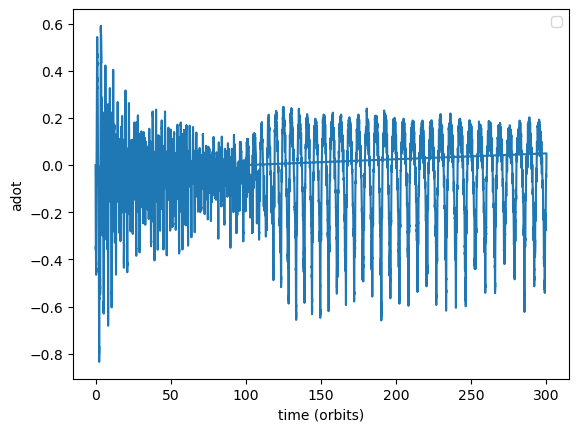

In [26]:
fig, ax = plt.subplots(1, 1)
ax.plot(t / ( 2 * np.pi), adot)
# ax.plot(t, dM1/0.06510981, label='dM1') 
# ax.plot(t, dM2/0.06510981, label='dM2')
# ax.set_ylim(0, 0.5)
ax.set_ylabel('adot')
ax.set_xlabel('time (orbits)')
fig.savefig(plot_dir + 'adot')
plt.legend()
plt.show()
# plt.close(fig) #delete figure from memory

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


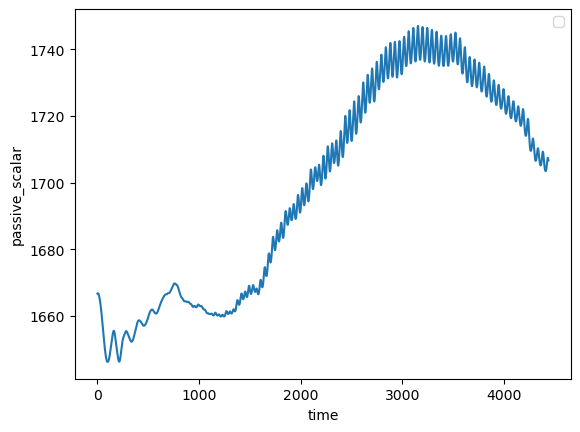

In [40]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, passive_scalar)
# ax.plot(t, dM1/0.06510981, label='dM1') 
# ax.plot(t, dM2/0.06510981, label='dM2')
# ax.set_ylim(0, 0.5)
ax.set_ylabel('passive_scalar')
ax.set_xlabel('time')
fig.savefig(plot_dir + 'passive_scalar')
plt.legend()
plt.show()
# plt.close(fig) #delete figure from memory